# <center> Titanic  </center>

### Import libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

### Load data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

### Train data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Test data

In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Gender Submission

In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## <center> Visualize and preprocess train data </center>

### Describe data

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Columns

In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data type of each column

In [8]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Number of missing values

In [9]:
column_names = train_data.columns
for column in column_names:
    print(column + ' - ' + str(train_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


- The columns 'Age' and 'Cabin' contains more null values.

### Insights
- 'Survived' is the target column/variable.
- 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
- 'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques.
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values. 
- We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

### Visualization of 'Survived' (Target column)
- As we know, majority of passengers couldn't survive.
- Data is imbalanced.

In [10]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

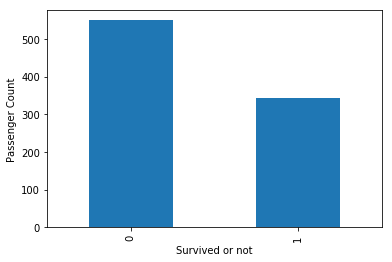

In [11]:
plt = train_data.Survived.value_counts().plot('bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

### Pclass
- Majority of them are from 3rd class.

Text(0, 0.5, 'Survival Probability')

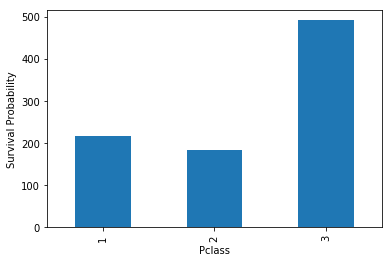

In [12]:
plt = train_data.Pclass.value_counts().sort_index().plot('bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [13]:
train_data[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
train_data[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
train_data['Survived'].sum()

342

### Pclass - Survival probability

Text(0, 0.5, 'Survival Probability')

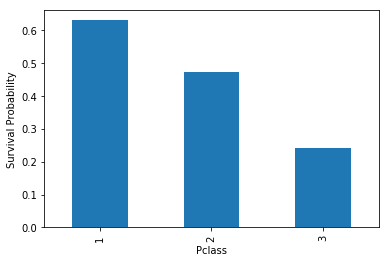

In [16]:
plt = train_data[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot('bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

- From the above results, we can say that, 1st class has high chance of surviving than the other two classes.

### Sex
- Majority of them are Male.

Text(0, 0.5, 'Passenger count')

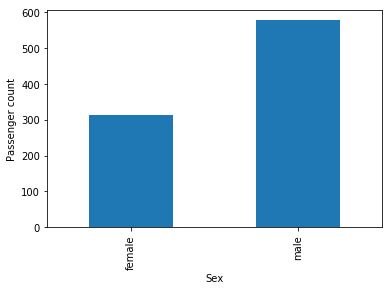

In [17]:
plt = train_data.Sex.value_counts().sort_index().plot('bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

### Sex - Survival probability
- As we see, the survival probaility for Female is more. They might have given more priority to female than male.

Text(0, 0.5, 'Survival Probability')

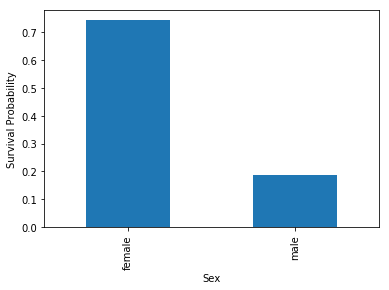

In [18]:
plt = train_data[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot('bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

### Embarked
- Most of them are from Southampton(S).

Text(0, 0.5, 'Passenger count')

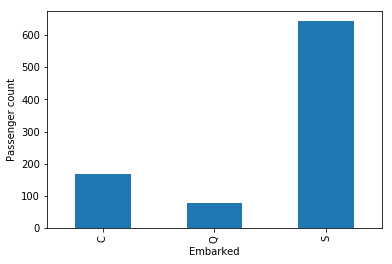

In [19]:
plt = train_data.Embarked.value_counts().sort_index().plot('bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

### Embarked - Survival probability
- Survival probability: C > Q > S

Text(0, 0.5, 'Survival Probability')

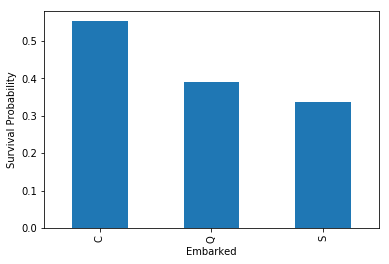

In [20]:
plt = train_data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot('bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

### SibSp - Siblings/Spouse

Text(0, 0.5, 'Passenger count')

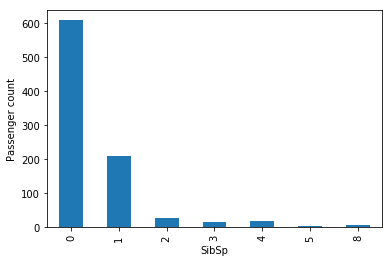

In [21]:
plt = train_data.SibSp.value_counts().sort_index().plot('bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

- As we can see, majority of them have no Siblings/Spouse.

Text(0, 0.5, 'Survival Probability')

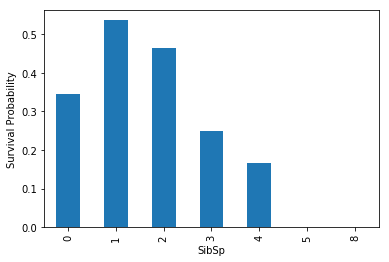

In [22]:
plt = train_data[['SibSp', 'Survived']].groupby('SibSp').mean().Survived.plot('bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

- The passengers having one sibling/spouse has more survival probability.
- '1' > '2' > '0' > '3' > '4'

### Parch - Children/Parents

Text(0, 0.5, 'Passenger count')

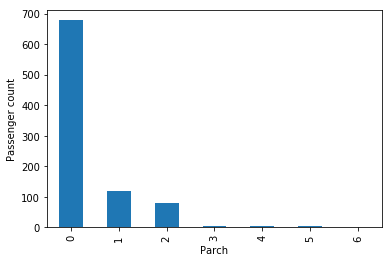

In [23]:
plt = train_data.Parch.value_counts().sort_index().plot('bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

- As we can see, majority of them have no Children/Parents.

Text(0, 0.5, 'Survival Probability')

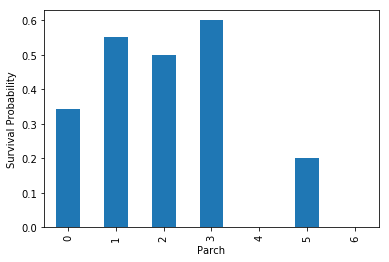

In [24]:
plt = train_data[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot('bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

- The passengers having three children/parents has more survival probability.
- '3' > '1' > '2' > '0' > '5'

In [ ]:
sns.lmplot('Age','Survived',data=train_data,hue='Pclass')

The above graphs shows that older the passenger, lesser the chance of survival

In [ ]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  data = train_data, split = True) 

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –

Good for children.
High for women in the age range 20-50.
Less for men as the age increases.

In [ ]:
train_data['Fare_Range'] = pd.qcut(train_data['Fare'], 4)
sns.barplot(x ='Fare_Range', y ='Survived',  data = train_data) 

 It can be concluded that if a passenger paid a higher fare, the survival rate is more.

In [ ]:
train_data['Age'].hist(bins=70)

The frequency of the people on the ship that are between 16-35 is much huge than the above that age or child below.

In [ ]:
sns.factorplot('Pclass','Survived',data=train_data,hue='Sex')

### Embarked vs Pclass

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


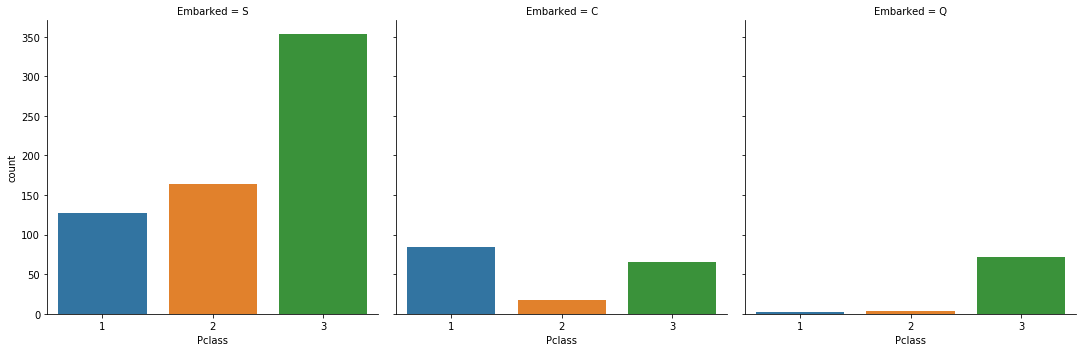

In [25]:
sns.factorplot('Pclass', col = 'Embarked', data = train_data, kind = 'count')

### Pclass vs Sex
- Majority of the passengers are Male in every class. But, the survival probability for female is high.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


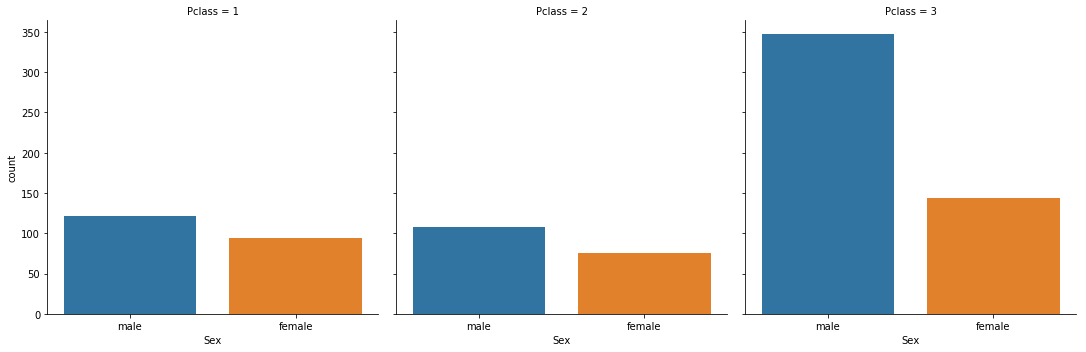

In [26]:
sns.factorplot('Sex', col = 'Pclass', data = train_data, kind = 'count')

### Embarked vs Sex

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


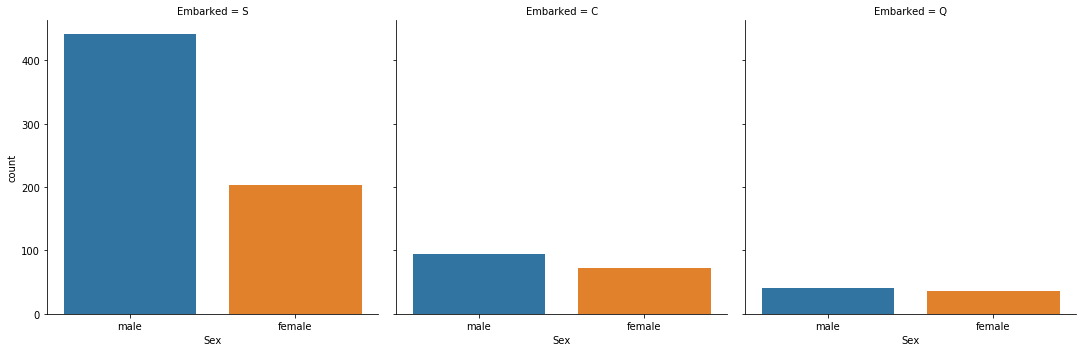

In [27]:
sns.factorplot('Sex', col = 'Embarked', data = train_data, kind = 'count')

### Create a new feature 'Family size' from the features 'SibSp' and 'Parch'

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Remove unnecessary columns
- We can remove 'Ticket' and 'PassengerId', as they don't contribute to target class.
- Remove 'Cabin' as it has a lot of missing values in both train and test data

In [31]:
train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [32]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


### Map 'Sex' and 'Embarked' to numerical values.

In [33]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [34]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


### Preprocess 'Name'
- Extarct title from name of the passenger and categorize them.
- Drop the column 'Name'

In [35]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data = train_data.drop(columns='Name')

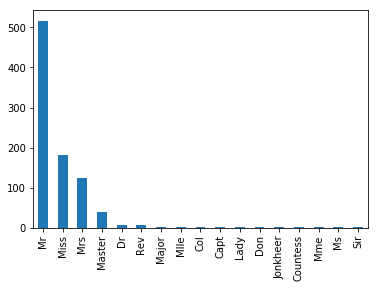

In [36]:
train_data.Title.value_counts().plot('bar')

- Combine some of the classes and group all the rare classes into 'Others'.

In [37]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

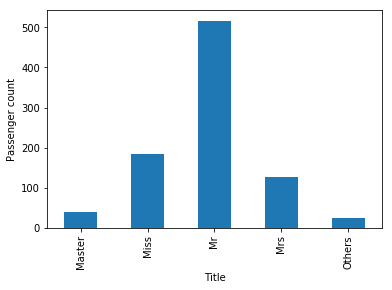

In [38]:
plt = train_data.Title.value_counts().sort_index().plot('bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

- The passengers with title 'Mr' are more.

Text(0, 0.5, 'Survival Probability')

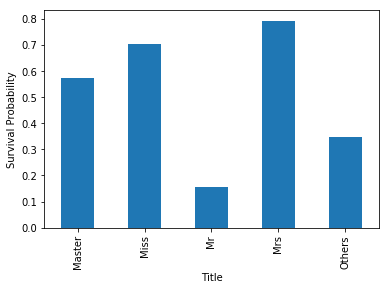

In [39]:
plt = train_data[['Title', 'Survived']].groupby('Title').mean().Survived.plot('bar')
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

- The survival probability for 'Mrs' and 'Miss' is high comapred to other classes.

### Map 'Title' to numerical values

In [40]:
train_data['Title'] = train_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [41]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


### Correlation between columns

In [42]:
corr_matrix = train_data.corr()

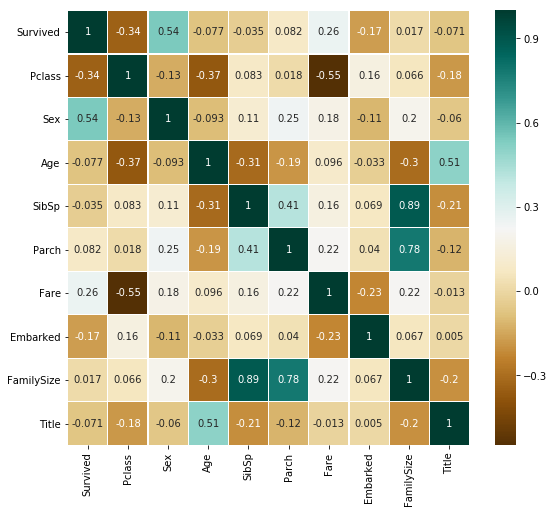

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

- There are no very highly correlated columns.

### Handling missing values

In [44]:
train_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
Title           0
dtype: int64

### Impute 'Embarked' with it's majority class.

In [45]:
train_data['Embarked'].isnull().sum()

2

- There are two null values in the column 'Embarked'. Let's impute them using majority class.
- The majority class is 'S'. Impute the unkonown values (NaN) using 'S'

In [46]:
train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


### Missing values - 'Age'
- Let's find the columns that are useful to predict the value of Age.

In [47]:
corr_matrix = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

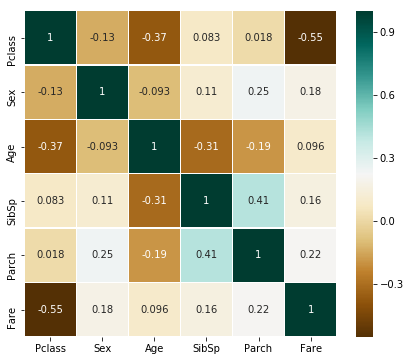

In [48]:
plt.figure(figsize=(7, 6))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

- Age is not correlated with 'Sex' and 'Fare'. So, we don't consider these two columns while imputing 'Sex'.
- 'Pclass', 'SibSp' and 'Parch' are negatively correlated with 'Sex'.
- Let's fill Age with the median age of similar rows from 'Pclass', 'SibSp' and 'Parch'. If there are no similar rows, fill the age with the median age of total dataset.

In [49]:
NaN_indexes = train_data['Age'][train_data['Age'].isnull()].index

In [50]:
for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == train_data.iloc[i]["SibSp"]) & (train_data.Parch == train_data.iloc[i]["Parch"]) & (train_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        train_data['Age'].iloc[i] = pred_age
    else:
        train_data['Age'].iloc[i] = train_data['Age'].median()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

- There are no missing values in the data.

In [52]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


## <center> Preprocess test data </center>

### Read test data

In [53]:
test_data = pd.read_csv('test.csv')

In [54]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Drop 'Ticket', 'PassengerId' and 'Cabin' columns

In [55]:
test_data = test_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [56]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


### Convert 'Sex' and 'Embarked' to Numerical values

In [57]:
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})
test_data['Embarked'] = test_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [58]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,2
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,1
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,2


### Extract 'Title' from 'Name' and convert to Numerical values.

In [59]:
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data = test_data.drop(columns='Name')

test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')

test_data['Title'] = test_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [60]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,1,2.0
1,3,1,47.0,1,0,7.0000,2,3.0
2,2,0,62.0,0,0,9.6875,1,2.0
3,3,0,27.0,0,0,8.6625,2,2.0
4,3,1,22.0,1,1,12.2875,2,3.0


### Number of missing values

In [61]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

### Impute 'Age' using median of columns 'SibSp', 'Parch' and 'Pclass'

In [62]:
NaN_indexes = test_data['Age'][test_data['Age'].isnull()].index

for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == test_data.iloc[i]["SibSp"]) & (train_data.Parch == test_data.iloc[i]["Parch"]) & (test_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        test_data['Age'].iloc[i] = pred_age
    else:
        test_data['Age'].iloc[i] = train_data['Age'].median()

### Impute 'Title' with it's mode

In [63]:
title_mode = train_data.Title.mode()[0]
test_data.Title = test_data.Title.fillna(title_mode)

### Impute 'Fare' with it's mean

In [64]:
fare_mean = train_data.Fare.mean()
test_data.Fare = test_data.Fare.fillna(fare_mean)

### Create a new feature 'FamilySize' from 'SibSp' and 'Parch'

In [65]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [66]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,0,34.5,0,0,7.8292,1,2.0,1
1,3,1,47.0,1,0,7.0000,2,3.0,2
2,2,0,62.0,0,0,9.6875,1,2.0,1
3,3,0,27.0,0,0,8.6625,2,2.0,1
4,3,1,22.0,1,1,12.2875,2,3.0,3


### Split 'train data' into 'training data' and 'validation data'

In [67]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [68]:
from sklearn.utils import shuffle
train_data = shuffle(train_data)

In [69]:
# training_data, valid_data = train_test_split(train_data, test_size=0.2)

In [70]:
X_train = train_data.drop(columns='Survived')
y_train = train_data.Survived
y_train = pd.DataFrame({'Survived':y_train.values})

In [71]:
# X_valid = valid_data.drop(columns='Survived')
# y_valid = valid_data.Survived

In [72]:
X_test = test_data

## <center> Preprocessed data </center>

In [73]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
390,1,0,36.0,1,2,120.0000,2.0,4,2
589,3,0,26.0,0,0,8.0500,2.0,1,2
257,1,1,30.0,0,0,86.5000,2.0,1,1
795,2,0,39.0,0,0,13.0000,2.0,1,2
122,2,0,32.5,1,0,30.0708,0.0,2,2


In [74]:
y_train.head()

,Survived
0,1
1,0
2,1
3,0
4,0


In [75]:
X_train.shape

(891, 9)

In [76]:
y_train.shape

(891, 1)

In [77]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,0,34.5,0,0,7.8292,1,2.0,1
1,3,1,47.0,1,0,7.0000,2,3.0,2
2,2,0,62.0,0,0,9.6875,1,2.0,1
3,3,0,27.0,0,0,8.6625,2,2.0,1
4,3,1,22.0,1,1,12.2875,2,3.0,3


- It's time to use this preprocessed data and apply different modelling algorithms.
- Hope this kernel helps you.
- Don't forget to UPVOTE, if you find this kernel interesting.

# Feature Selection

### Filter Method

* Anova

Numerical Input, Categorical Output

In [78]:
# Importing libraries for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [79]:
# Fit the model
bestfeatures = SelectKBest(score_func=f_classif, k=9)
fit = bestfeatures.fit(X_train,y_train)
fit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=9, score_func=<function f_classif at 0x00000207D9C45BF8>)

In [80]:
# Score of each column
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [81]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores

,Specs,Score
0,Pclass,115.031272
1,Sex,372.405724
2,Age,2.211055
3,SibSp,1.110572
4,Parch,5.963464
5,Fare,63.030764
6,Embarked,25.717286
7,FamilySize,0.246193
8,Title,4.526394


In [82]:
# Top 9 highest score
print(featureScores.nlargest(9, 'Score'))

        Specs       Score
1         Sex  372.405724
0      Pclass  115.031272
5        Fare   63.030764
6    Embarked   25.717286
4       Parch    5.963464
8       Title    4.526394
2         Age    2.211055
3       SibSp    1.110572
7  FamilySize    0.246193


====> Higher the score means more important is the column.

As FamilySize is not contributing much so we would drop that feature.

In [83]:
X_train = X_train.drop('FamilySize', axis=1)

In [84]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
390,1,0,36.0,1,2,120.0000,2.0,2
589,3,0,26.0,0,0,8.0500,2.0,2
257,1,1,30.0,0,0,86.5000,2.0,1
795,2,0,39.0,0,0,13.0000,2.0,2
122,2,0,32.5,1,0,30.0708,0.0,2


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# From sckrit-learn library import train_test_split to train and split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state = 101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Test Split

## Classificaiton Methods


* Logistic Regression
* Decisison Tree
* Random Forest Regression
* Support Vector Machine (SVM)
* K-Nearest Neighbors (KNN)
* Naive Bayes 
* XG Boost
* Ensemble 

## Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("Accuracy: ", log_reg.score(X_test,y_test))

## Decision Tree

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
print("Accuracy: ", dtree.score(X_test,y_test))

## Random Forest Regression

In [ ]:
rf_reg = RandomForestClassifier()
rf_reg.fit(X_train, y_train)
print("Accuracy: ", rf_reg.score(X_test,y_test))

## Support Vector Machine (SVM)

In [ ]:
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
print("Accuracy: ", svm_clsf.score(X_test,y_test))

## KNN

In [ ]:
knn_clsf = KNeighborsClassifier(n_neighbors=9)
knn_clsf.fit(X_train, y_train)
print("Accuracy: ", knn_clsf.score(X_test,y_test))

## Naive Bais

In [ ]:
# Fitting Naive Bais Classification to the Training set
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy: ", nb.score(X_test,y_test))

## XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
print("Accuracy: ", model.score(X_test,y_test))

## Ensemble Modeling

In [ ]:
voting_classfication = VotingClassifier(estimators = [('lg', log_reg), ('rfg', rf_reg), ('svc', svm_clsf), ('knn', knn_clsf) ,('XG Boost',model),('Decision Tree',dtree),('Naive Bayes',nb)], voting="hard", n_jobs=-1)
voting_classfication.fit(X_train, y_train)
print("Accuracy: ", voting_classfication.score(X_test,y_test))

## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(train_data)

In [ ]:
scaled_data = scaler.transform(train_data)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)


Now we can transform this data to its first 2 principal components.

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

In [ ]:
x_pca.shape

We've reduced 10 dimensions to just 2! Let's plot these two dimensions out!

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=train_data['Survived'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
kfold = StratifiedKFold(n_splits=10)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
# RFC Parameters tunning 
rf_clf = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [4,6],
              "max_features": [5,10],
              "min_samples_split": [2, 6],
              "min_samples_leaf": [1, 5],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gs_rf_clf = GridSearchCV(rf_clf,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gs_rf_clf.fit(X_train, y_train)
y_pred = gs_rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

## LDA

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model=LDA()
model.fit(X_train,y_train)

In [ ]:
# Predicting training data with the model constructed 
yp_train=model.predict(X_train)
accuracy=metrics.accuracy_score(y_train,yp_train)
confusion=metrics.confusion_matrix(y_train,yp_train)
print(accuracy)
print(confusion)

In [ ]:
# Predicting test data with the model constructed 
yp_test =model.predict(X_test)
accuracy=metrics.accuracy_score(y_test,yp_test)
confusion=metrics.confusion_matrix(y_test,yp_test)
print(accuracy)
print(confusion)

## Deep Learning

In [ ]:
# Now let's make the ANN
# Importing libraries
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(4, activation='relu', input_dim=9))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(4, activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the ANN to Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

In [ ]:
# Making the prediction and evaluating the model
y_pred6 = classifier.predict(X_test)
y_pred6 = (y_pred6>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred6)
cm